In [ ]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scikitplot.cluster import plot_elbow_curve

In [2]:
data=pd.read_csv("BlackFriday.csv")

In [3]:
data.drop("User_ID", axis=1, inplace=True)

In [4]:
data.drop("Product_ID", axis=1, inplace=True)

In [5]:
three = data.Product_Category_3.apply(lambda x: 3 if str(x)!="nan" else 0 )
two = data.Product_Category_2.apply(lambda x: 1 if str(x)=="nan" else 0 )
data['Product']=(two+three).replace(0,2)

In [6]:
to_drop = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
data.drop(to_drop, axis=1, inplace=True)

In [7]:
def gen_other(n_top, df, field):
	keys = list(df[field].value_counts().nlargest(int(n_top)).to_dict().keys())
	df[field] = df[field].apply(lambda x:x if x in keys else 'other')

In [8]:
data['Occupation'] = data['Occupation'].astype('str')
data['Marital_Status'] = data['Marital_Status'].astype('str')

In [9]:
ntop = 5 
columns =['Gender', 'City_Category', 'Stay_In_Current_City_Years', 'Occupation', 
            'Age']
for column in columns:
    gen_other(ntop, data, column)

In [10]:
data_new1 = data[['Marital_Status','Product']]

In [11]:
for column in columns:
	dummy = pd.get_dummies(data[column])
	data_new1 = pd.concat([data_new1, dummy], axis = 1)

In [12]:
del data

In [13]:
data_new1 = data_new1.drop(['other', 'M', 'C'], axis = 1)

In [15]:
data_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 20 columns):
Marital_Status    537577 non-null object
Product           537577 non-null int64
F                 537577 non-null uint8
A                 537577 non-null uint8
B                 537577 non-null uint8
0                 537577 non-null uint8
1                 537577 non-null uint8
2                 537577 non-null uint8
3                 537577 non-null uint8
4+                537577 non-null uint8
0                 537577 non-null uint8
1                 537577 non-null uint8
17                537577 non-null uint8
4                 537577 non-null uint8
7                 537577 non-null uint8
18-25             537577 non-null uint8
26-35             537577 non-null uint8
36-45             537577 non-null uint8
46-50             537577 non-null uint8
51-55             537577 non-null uint8
dtypes: int64(1), object(1), uint8(18)
memory usage: 17.4+ MB


In [16]:
model1_cluster = KMeans(5,random_state=42)


In [17]:
model1_cluster.fit_predict(data_new1)


array([4, 3, 4, ..., 2, 2, 2])

In [18]:
model1_cluster.cluster_centers_


array([[ 2.04092456e-01,  2.45504633e+00,  2.41437221e-01,
         2.68749724e-01,  4.30459186e-01,  1.62991117e-01,
         3.20163227e-01,  1.94826240e-01,  1.57879230e-01,
         1.64140187e-01,  8.95979729e-02,  3.71532535e-02,
         4.15727523e-02,  4.85054728e-01,  1.92542832e-02,
         1.00000000e+00,  4.06785716e-13,  1.90458760e-13,
        -1.07733267e-13,  6.74321710e-14],
       [ 3.78735883e-01,  1.54983257e+00,  2.18776648e-01,
         3.66766498e-01,  4.10661176e-01,  1.95638610e-01,
        -9.34807787e-13,  2.75150267e-01,  2.80193840e-01,
         2.49017283e-01,  1.53563778e-01,  8.85588902e-02,
         7.89501050e-02,  1.05967014e-01,  1.07974044e-01,
        -1.60232938e-13,  1.00000000e+00,  7.27751193e-14,
        -1.30853661e-13,  7.42184092e-14],
       [ 4.50949407e-01,  1.50884533e+00,  2.80247519e-01,
         2.61192851e-01,  4.33583126e-01, -2.57571742e-13,
         1.00000000e+00, -6.90003610e-14,  2.19047003e-13,
        -8.03523914e-14,  1.2

In [19]:
model1_cluster.inertia_


1353197.1115228655

In [20]:
sse={}
for k in range(1,11):
    cluster_wine=KMeans(k,random_state=42)
    cluster_wine.fit_predict(data_new1)
    sse[k] = cluster_wine.inertia_ #Sum of squared distances of samples to their closest cluster center, 
                                        #other measures of distances can also be taken
        
#lets see what sse contains
print(sse)

{1: 1832991.1725873689, 2: 1593043.0090670877, 3: 1481124.729476766, 4: 1404929.1601382117, 5: 1353197.1115228655, 6: 1303763.5447649918, 7: 1257669.7994408773, 8: 1235160.5045173252, 9: 1202141.494749553, 10: 1166777.9506251724}


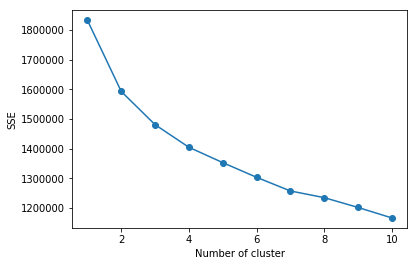

In [21]:
plt.figure()
plt.plot(sse.keys(),sse.values(), marker="o") #sse is dictionary 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [22]:
model1_cluster = KMeans(4,random_state=42)


In [23]:
model1_cluster.fit_predict(data_new1)


array([3, 2, 3, ..., 3, 3, 3])

In [24]:
model1_cluster.cluster_centers_


array([[ 2.08359923e-01,  1.82044328e+00,  2.51951303e-01,
         2.84423936e-01,  4.38208728e-01,  1.67124834e-01,
         3.17117471e-01,  1.97989789e-01,  1.52631191e-01,
         1.65136714e-01,  7.38181729e-02,  3.16381130e-02,
         2.92204605e-02,  5.82396544e-01,  1.77826322e-02,
         9.98539591e-01,  5.79369885e-13,  2.76445533e-13,
         2.57719307e-04,  4.78621570e-04],
       [ 3.90740318e-01,  1.55002218e+00,  2.41870219e-01,
         3.49684757e-01,  4.17942651e-01,  1.26453547e-01,
         3.53637060e-01,  1.77846936e-01,  1.81106914e-01,
         1.60955543e-01,  1.56687324e-01,  8.81471225e-02,
         7.16119752e-02,  9.76245849e-02,  1.10509901e-01,
         4.07396339e-13,  1.00000000e+00, -3.46722651e-13,
        -1.50476853e-13, -1.13853371e-13],
       [ 4.23294961e-01,  3.00000000e+00,  2.23790996e-01,
         2.45724867e-01,  4.13822149e-01,  1.33094006e-01,
         3.53609295e-01,  1.86314227e-01,  1.77957830e-01,
         1.49024641e-01,  1.3

In [25]:
model1_cluster.inertia_


1404929.1601382117